# 2 Multiple Qubits and Entanglement

`|ba⟩ = |b⟩ ⊗ |a⟩`


In [1]:
# imports, baseline
import warnings
from math import sqrt, pi

import matplotlib.cbook
import numpy as np
from IPython.display import display
from qiskit import QuantumCircuit, Aer, assemble
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_bloch_vector
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_state_qsphere
from qiskit_textbook.tools import array_to_latex
from qiskit_textbook.widgets import plot_bloch_vector_spherical
# plot_bloch_vector(), as input only takes cartesian coordinates; as output s output does graph the Bloch sphere
# plot_bloch_vector_spherical(), does the conversion between cartesian coordinates and spherical coordinates. As input takes spherical coordinates; as output does graph the Bloch sphere
# plot_bloch_multivector, as input it takes a statevector; as output does graph the Bloch sphere

# https://stackoverflow.com/questions/24502500/python-matplotlib-getting-rid-of-matplotlib-mpl-warning
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

# 2.2 Multiple Qubits and Entanglement States

## 2.2.1 Representing Multi-Qubit States

Representing multi-qubit states: as statevector of 2<sup>n</sup> dimensions, where `n` is the number of qubits, and a<sub>nm</sub> is the amplitude probability for the state `|nm⟩`.

|ψ⟩ = a<sub>00</sub>|00⟩ = a<sub>01</sub>|01⟩ + a<sub>10</sub>|10⟩ + a<sub>11</sub>|11⟩



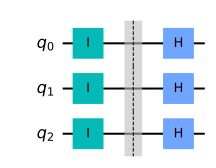

In [2]:
qc = QuantumCircuit(3)
#
# ENCODE
#
# do nothing, apply the I-gate to all the qubit
for qubit in range(3):
    qc.id(qubit)
qc.barrier()

# 
# COMPUTE
#
# Apply H-gate to each qubit:
for qubit in range(3):
    qc.h(qubit)

#
# MEASURE
#
# n/a

# See the circuit:
qc.draw()

In [3]:
# Let's see the result
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()

print("Qubit statevector = " + str(final_state))
# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(final_state) instead.
from qiskit_textbook.tools import array_to_latex
array_to_latex(final_state, pretext="\\text{Statevector} = ")

#Each qubit is in the state `|+⟩`, so we should see the vector: |+++⟩

Qubit statevector = [0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j
 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j]


<IPython.core.display.Math object>

### 2.2.1.2 Quick exercises

#### Write down the tensor product of the qubits: `|0⟩|1⟩`

`|01⟩ = |0⟩|1⟩ = |0⟩ ⊗ |1⟩`

```
|1 x |0||
|    |1||
|       |
|0 x |0||
|    |1|| 
```

```
         |0|
|0⟩|1⟩ = |1|
         |0|
         |0|
```

#### Write down the tensor product of the qubits: `|0⟩|+⟩`
`|0+⟩ = |0⟩|+⟩ = |0⟩ ⊗ |+⟩`

```
|1 x |1/√2||
|    |1/√2||
|          |
|0 x |1/√2||
|    |1/√2|| 
```

```
          |1/√2|
|0⟩|+⟩ =  |1/√2|
          | 0  |
          | 0  |
```

#### Write down the tensor product of the qubits: `|+⟩|1⟩`
`|+1⟩ = |+⟩|1⟩ = |+⟩ ⊗ |1⟩`

```
|1/√2 x |0||
|       |1||
|          |
|1/√2 x |0||
|       |1|| 
```

```
          | 0  |
|+⟩|1⟩ =  |1/√2|
          | 0  |
          |1/√2|
```

#### Write down the tensor product of the qubits: `|-⟩|+⟩`
`|-+⟩ = |-⟩|+⟩ = |-⟩ ⊗ |+⟩`

```
| 1/√2 x |1/√2||
|        |1/√2||
|              |
|-1/√2 x |1/√2||
|        |1/√2|| 
```

```
          | 1/4|
|-⟩|+⟩ =  | 1/4|
          |-1/4|
          |-1/4|
```

#### Write the state: `|ψ⟩ = 1/√2 |00⟩ + i 1/√2 |01⟩` as two separate qubits.

`|0⟩` and `|i⟩` statevectors look like:
```math
|0⟩ = |1|
      |0|
|i⟩ = |  1/√2|
      |i 1/√2|
```

Outer product of `|0⟩` and `|i⟩` is:

`|0⟩i⟩ = |0⟩ ⊗ |i⟩ = |0i⟩`
```math
| 1 x |  1/√2||
|     |i 1/√2||
|             |
| 0 x |  1/√2||
|     |i 1/√2|| 
```

Outcome of outer product is a new statevector:
`|0⟩i⟩ = |0⟩ ⊗ |i⟩ =`
```math
|   1/√2|
| i 1/√2|
|   0   |
|   0   |
```

`|ψ⟩ = |0⟩|i⟩ = 1/√2 |00⟩ + i 1/√2 |01⟩` 


## 2.2.2 Single Qubit Gates on Multi-Qubit Statevectors

How a single qubit gate acts on a qubit in a multi-qubit vector?. Answer: just as we used the tensor product to calculate multi-qubit statevectors, we use the tensor product to calculate matrices that act on these statevectors.

X|q1⟩ ⊗ H|q0⟩ = (X ⊗ H) |q1q0⟩
(X ⊗ H), is a 4 x 4 matrix, since X and H are each a 2 x 2 matrix.


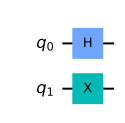

In [4]:
qc = QuantumCircuit(2)
#
# ENCODE
#
# n/a

#
# COMPUTE
#
qc.h(0)
qc.x(1)

#
# MEASURE
#
# n/a

# View the circuit
print('X|q1⟩ ⊗ H|q0⟩ = (X ⊗ H) |q1q0⟩')
print('(X ⊗ H), is a 4 x 4 matrix, since X and H are each a 2 x 2 matrix.')
qc.draw()


In [5]:
# Instead of calculating the outer product of matrices by hand, we can use Qiskit’s unitary_simulator to calculate this for us. 

# The unitary simulator multiplies all the gates in our circuit together to compile a single unitary matrix that performs the whole quantum circuit:
usim = Aer.get_backend('unitary_simulator')
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()

# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(unitary) instead.
from qiskit_textbook.tools import array_to_latex
array_to_latex(unitary, pretext="\\text{Circuit = }\n")

<IPython.core.display.Math object>

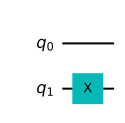

In [6]:
# If we want to apply a gate to only one qubit at a time (such as in the circuit below), we describe this using tensor product with the identity matrix, e.g.: X ⊗ I
qc = QuantumCircuit(2)
qc.x(1)
qc.draw()

In [7]:
# Simulate the unitary
usim = Aer.get_backend('unitary_simulator')
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
# Display the results:
array_to_latex(unitary, pretext="\\text{Circuit = } ")

<IPython.core.display.Math object>

### 2.2.2.1 Quick Exercises: 

#### 1. Calculate the single qubit unitary `(U)` created by the sequence of gates:  
`U = XZH`. Use Qiskit's unitary simulator to check your results.

H|q2⟩ ⊗ Z|q1⟩ ⊗ X|q0⟩= (H ⊗ Z ⊗ X) |q2q1q0⟩ 

(H ⊗ Z ⊗ X), will be a 8 x 8 matrix, because we have 3 qubits, hence 2^3 = 8 

An alternative view is that since H, Z and X are each a 2 x 2 matrix, then their outer product is 2 x 2 x 2 = 8.



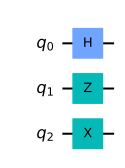

In [8]:
qc = QuantumCircuit(3)
#
# ENCODE
#
# n/a

#
# COMPUTE
#
qc.h(0)
qc.z(1)
qc.x(2)
qc.draw()

#
# MEASURE
#
# n/a

# View the circuit
print('H|q2⟩ ⊗ Z|q1⟩ ⊗ X|q0⟩= (H ⊗ Z ⊗ X) |q2q1q0⟩ \n')
print('(H ⊗ Z ⊗ X), will be a 8 x 8 matrix, because we have 3 qubits, hence 2^3 = 8 \n')
print('An alternative view is that since H, Z and X are each a 2 x 2 matrix, then their outer product is 2 x 2 x 2 = 8.\n')
qc.draw()

In [9]:
# Simulate the unitary
usim = Aer.get_backend('unitary_simulator')
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
# Display the results:
print('This is the unitary matrix of the quantum circuit U = H ⊗ Z ⊗ X')
array_to_latex(unitary, pretext="\\text{Circuit = U = H ⊗ Z ⊗ X = HZX=} ")
# U = H ⊗ Z ⊗ X

This is the unitary matrix of the quantum circuit U = H ⊗ Z ⊗ X


<IPython.core.display.Math object>

### Sandbox. What is the statevector outcome of (U)|000⟩?

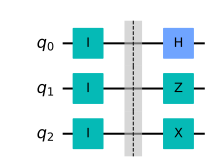

In [10]:
# sandbox
#what is (U)|000⟩?
# QuantumCircuit object to store our circuits, this is essentially a list of the quantum operations on our circuit and the qubits they are applied to.
qc = QuantumCircuit(3)
# ENCODE, n/a
qc.id(0) # so that qubit #0 is in state |0⟩
qc.id(1) # so that qubit #1 is in state |0⟩
qc.id(2) # so that qubit #2 is in state |0⟩
qc.barrier()

# COMPUTE, U = H ⊗ Z ⊗ X
qc.h(0)
qc.z(1)
qc.x(2)

# MEASURE, n/a

# View the circuit
qc.draw()

In [11]:
# sandbox
# use one of Qiskit’s simulators to view the state the qubit.

# define the simulator to use
svsim = Aer.get_backend('statevector_simulator')
# Create a Qobj from the circuit for the simulator to run
qobj = assemble(qc)     

# To get the results from our circuit, we use execute to run our circuit, giving the circuit and the backend as arguments. 
# Do the simulation and return the result
out_state = svsim.run(qobj).result().get_statevector()

# Display the output state vector
print(out_state)
print(type(out_state))
# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(final_state) instead.
from qiskit_textbook.tools import array_to_latex
array_to_latex(out_state, pretext="\\text{Statevector} = (U)|000⟩ =")

print('Looks to me that (U)|000⟩ = (XZH)|000⟩ = 1/√2|100⟩ + 1/√2|101⟩')

[ 0.        +0.j  0.        +0.j -0.        +0.j -0.        +0.j
  0.70710678+0.j  0.70710678+0.j -0.        +0.j -0.        +0.j]
<class 'numpy.ndarray'>


<IPython.core.display.Math object>

Looks to me that (U)|000⟩ = (XZH)|000⟩ = 1/√2|100⟩ + 1/√2|101⟩


## 2.2.3 Multi-Qubit Gates

### 2.2.3.1 The CNOT-Gate

This gate is a conditional gate that performs an X-gate on the second qubit (target), if the state of the first qubit (control) is `|1⟩`.

The format is `.cx(<control_qubit>, <target_qubit>)`.

This matrix swaps the amplitudes of `|01⟩` and `|11⟩` in our input statevector.

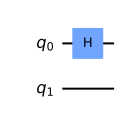

<IPython.core.display.Math object>

In [12]:
# We have seen how this acts on classical states, but let’s now see how it acts on a qubit in superposition. We will put one qubit in the state |+⟩
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
display(qc.draw())

# Let's see the result:
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
# Print the statevector neatly:
array_to_latex(final_state, pretext="\\text{Statevector = }")

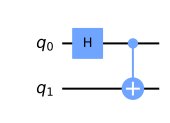

<IPython.core.display.Math object>

In [13]:
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
# Apply a CNOT:
qc.cx(0,1)
display(qc.draw())

# This matrix swaps the amplitudes of |01⟩ and |11⟩ in our statevector:
# Let's get the result:
qobj = assemble(qc)
result = svsim.run(qobj).result()
# Print the statevector neatly:
final_state = result.get_statevector()
array_to_latex(final_state, pretext="\\text{Statevector = }")

### Application of C-NOT gate: put two qubits in entanglement state

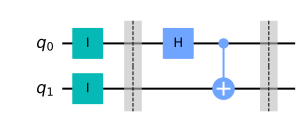

<IPython.core.display.Math object>

In [14]:
qc = QuantumCircuit(2)
# ENCODE
qc.id(0)
qc.id(1)
qc.barrier()

# COMPUTE
# Hadamard the first qubit
qc.h(0)
# Apply CNOT
qc.cx(0,1)
qc.barrier()

# MEASURE
# n/a

# Visualize, see the circuit:
display(qc.draw())

# Let's get the result:
from qiskit_textbook.tools import array_to_latex
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
result = svsim.run(qobj).result()

# Print the statevector neatly:
final_state = result.get_statevector()
array_to_latex(final_state, pretext="\\text{Statevector of CNOT|0+⟩ = 1/√2 (|00⟩ + |11⟩) =}")

###  2.2.3.2 Entangled States

The state `|ψ⟩ = 1/√2 (|00⟩ + |11⟩)` is known as a Bell state. 
We can see that this state has 50% probability of being measured in the state `|00⟩`, and 50% chance of being measured in the state `|11⟩`. Most interestingly, it has a 0% chance of being measured in the states `|01⟩` or `|10⟩`.

This combined state cannot be written as two separate qubit states, which has interesting implications. Although our qubits are in superposition, measuring one will tell us the state of the other and collapse its superposition. For example, if we measured the top qubit and got the state `|1⟩`, the collective state of our qubits changes like so:

```math
                  measure
1/√2 (|00⟩+|11⟩) −−−−−−−−−→   |11⟩
```

In other words, if we measure  the top qubit of `|ψ⟩` and we got `|1⟩`, then we know for sure that the bottom qubit measurement will also be `|1⟩`.

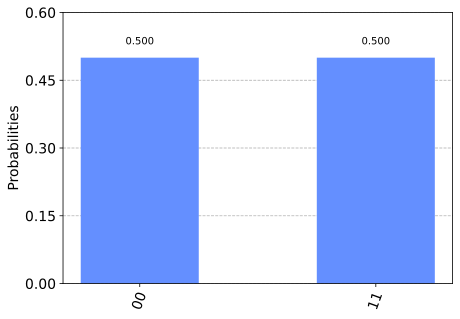

In [15]:
plot_histogram(result.get_counts())

### 2.2.3.3 Visualizing Entangled States

We have seen that this state cannot be written as two separate qubit states, this also means we lose information when we try to plot our state on separate Bloch spheres:

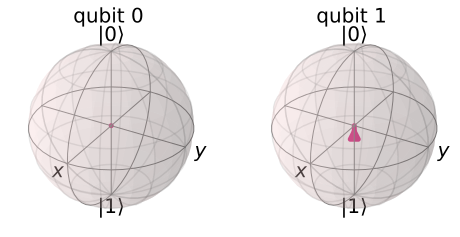

In [16]:
plot_bloch_multivector(final_state)

How else could we visualize this statevector? This statevector is simply a collection of four amplitudes (complex numbers), and there are endless ways we can map this to an image. One such visualization is the Q-sphere, here each amplitude is represented by a blob on the surface of a sphere. The size of the blob is proportional to the magnitude of the amplitude, and the colour is proportional to the phase of the amplitude. The amplitudes for `|00⟩` and `|11⟩` are equal, and all other amplitudes are 0.

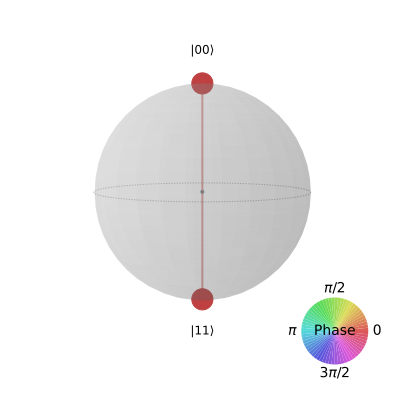

In [17]:
from qiskit.visualization import plot_state_qsphere
plot_state_qsphere(final_state)

### 2.2.3.4 Exercise: 

#### 1. Create a quantum circuit that produces the Bell state: `|ψ⟩ = 1/√2 (|01⟩ + |10⟩)`

Use the statevector simulator to verify your result.

Before applying the CNOT, the circuit looks like


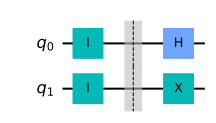

Before applying the CNOT, the statevector looks like


<IPython.core.display.Math object>

After applying the CNOT, the circuit looks like


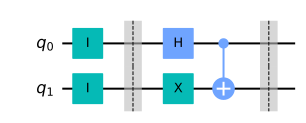

After applying the CNOT, the statevector looks like


<IPython.core.display.Math object>

In [18]:
# create a quantum circuit with two qubits and zero classical bits
qc = QuantumCircuit(2)

#
# ENCODE
qc.id(0)
qc.id(1)
qc.barrier()

#
# COMPUTE
# Apply H-gate to the first qubit, and an X-gate (NOT) to the second qubit
qc.h(0)
qc.x(1)
print('Before applying the CNOT, the circuit looks like')
display(qc.draw())
print('Before applying the CNOT, the statevector looks like')
# Get the resulting statevector
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
result = svsim.run(qobj).result().get_statevector()
# Print the statevector:
array_to_latex(result, pretext="\\text{Statevector = (X ⊗ H)|00⟩ = |1+⟩ =}")

# Apply a CNOT:
qc.cx(0,1)
qc.barrier()

#
# MEASURE
# n/a

# Visualize the quantum circuit
print('After applying the CNOT, the circuit looks like')
display(qc.draw())
print('After applying the CNOT, the statevector looks like')

# Get the resulting statevector
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
result = svsim.run(qobj).result().get_statevector()
# Print the statevector:
array_to_latex(result, pretext="\\text{Statevector = CNOT(X ⊗ H)|00⟩ = CNOT|1+⟩}")


#### 2. The circuit created in question 1 transforms the state `|00⟩` to `1/√2 (|01⟩ + |10⟩)`, calculate the unitary of this circuit using Qiskit's simulator. Verify this unitary does in fact perform the correct transformation.

In [19]:
# use Qiskit’s unitary_simulator to calculate the unitary matrix of the quantum circuit. The unitary simulator multiplies all the gates in our circuit together to compile a single unitary matrix that performs the whole quantum circuit:
usim = Aer.get_backend('unitary_simulator')
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()

# and view the results

# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(unitary) instead.
array_to_latex(unitary, pretext="\\text{Circuit = CNOT(X ⊗ H) =}\n")

<IPython.core.display.Math object>

Initial statevector is `|00⟩`

```math
       | 1 | 
|00⟩ = | 0 |
       | 0 |
       | 0 |
```

Doing the computation `CNOT(X ⊗ H)|00⟩` manually, we obtain the final statevector. After putting `|00⟩` through the quantum circuit `(qc)|00⟩` the result is: 
```math
            |  0   |
(qc)|00⟩ =  | 1/√2 | = 1/√2 (|01⟩ + |10⟩)
            | 1/√2 |
            |  0   |
```

#### 3. Think about other ways you could represent a statevector visually. Can you design an interesting visualization from which you can read the magnitude and phase of each amplitude?



# 2.3 Phase Kickback


## 2.3.1. Exploring the CNOT-Gate 

The CNOT gate swaps the amplitudes of `|01⟩` and `|11⟩`.

Hence, in the case of `|++⟩`, we should and see no change.  
And the case of `|-+⟩`is interesting, because it affects the state of the control qubit while leaving the state of the target qubit unchanged.

Summary:  
`CNOT|++⟩ = |++⟩`  
`CNOT|-+⟩ = |--⟩`

OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
id q[0];
id q[1];
barrier q[0],q[1];
h q[0];
h q[1];
cx q[0],q[1];
barrier q[0],q[1];



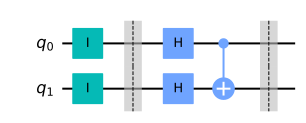

<IPython.core.display.Math object>

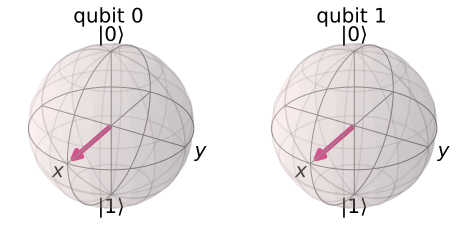

In [20]:
# Explore the quantum circuit CNOT|++⟩.
qc = QuantumCircuit(2)
# ENCODE
qc.id(0)
qc.id(1)
qc.barrier()

# COMPUTE
# Put both qubit 0 and 1 in the |+⟩ state
qc.h(0)
qc.h(1)
# Then CNOT
qc.cx(0,1)
qc.barrier()

# MEASURE
# n/a

print(qc.qasm())

# Visualize the circuit
display(qc.draw())

# Visualize the resulting statevector
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
array_to_latex(final_state, pretext="\\text{Statevector} = |ψ⟩ = CNOT(H ⊗ H)|00⟩ = CNOT|++⟩ = |++⟩ =", precision=1)
plot_bloch_multivector(final_state)

Now let’s experiment putting the target qubit in the state |−⟩, so it has a negative phase.

The result is interesting, because it affects the state of the control qubit while leaving the state of the target qubit unchanged.

`CNOT|-+⟩ = |--⟩`



Before applying the CNOT, the circuit looks like


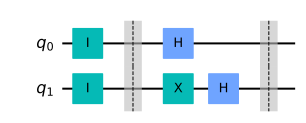



Before applying the CNOT, the statevector looks like


<IPython.core.display.Math object>

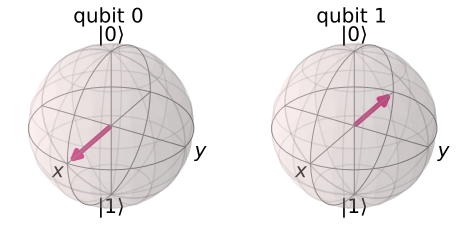



After applying the CNOT, the circuit looks like


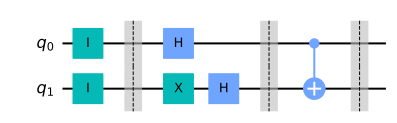



After applying the CNOT, the statevector looks like


<IPython.core.display.Math object>

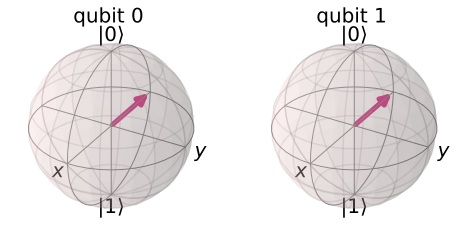

In [21]:
qc = QuantumCircuit(2)
# ENCODE
qc.id(0)
qc.id(1)
qc.barrier()

# COMPUTE
# Put qubit 0 in the state |+⟩
qc.h(0)
# Put qubit 1 in the state |-⟩
qc.x(1)
qc.h(1)
qc.barrier()

print('\n\nBefore applying the CNOT, the circuit looks like')
display(qc.draw())
print('\n\nBefore applying the CNOT, the statevector looks like')
# Get the resulting statevector
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
result = svsim.run(qobj).result().get_statevector()
# Print the statevector:
array_to_latex(result, pretext="\\text{Statevector = (qc)|00⟩ = |-+⟩ =}")
display(plot_bloch_multivector(result))

# Then CNOT
qc.cx(0,1)
qc.barrier()

# MEASURE
# n/a

# Visualize the circuit
print('\n\nAfter applying the CNOT, the circuit looks like')
display(qc.draw())
print('\n\nAfter applying the CNOT, the statevector looks like')
# Visualize the resulting statevector
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
array_to_latex(final_state, pretext="\\text{Statevector} = |ψ⟩ = (qc)|00⟩ = CNOT|-+⟩ = |--⟩", precision=1)

display(plot_bloch_multivector(final_state))

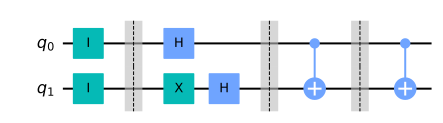

<IPython.core.display.Math object>

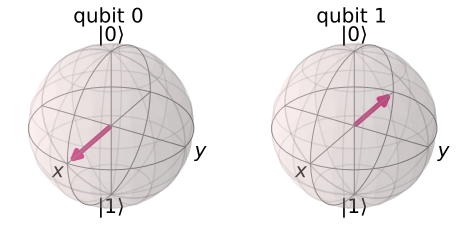

In [22]:
# MORE COMPUTATION
# apply CNOT
qc.cx(0,1)

# Visualize the quantum circuit
display(qc.draw())

# Visualize the resulting statevector
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
array_to_latex(final_state, pretext="\\text{Statevector} = CNOT|-+⟩ = |--⟩", precision=1)

# Visualize the two qubit in the Bloch sphere
plot_bloch_multivector(final_state)


## 2.3.2 Phase Kickback

### 2.3.2.1 Explaining the CNOT Circuit Identity 

States that  
`.cnot(1, 0)` # note the usual order is reversed

is the same than  
```
.h(0)
.h(1)
.cnot(0, 1)
.h(0)
.h(1)
```

This identity is very useful in hardware, since some hardwares only allow for CNOTs in one direction between two specific qubits. We can use this identity to overcome this problem and allow CNOTs in both directions.

It is kickback (or, phase kickback ) which is very important and is used in almost every quantum algorithm. Kickback is where the eigenvalue added by a gate to a qubit is ‘kicked back’ into a different qubit via a controlled operation. 

### 2.3.2.2 Kickback with the T-gate 

### Quick Exercises: